In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\sudar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import pandas as pd
import numpy as np
import string
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim_models 


In [9]:
data = pd.read_csv('tweets.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5000 non-null   int64 
 1   Tweet   5000 non-null   object
 2   Labels  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [11]:
data.head()

,ID,Tweet,Labels
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10
1,2,BanMediaHouse whose is responsible for spreadi...,6
2,3,Im waiting for someone to say to me that all t...,3 4
3,4,He is a liar. Proven day night. Time again. Li...,6
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8


In [12]:

#function to split text into word
tweets = data.Tweet.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(tweets)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

12184


['.', 'the', 'to', ',', 'corona', 'a', 'coronavirus', 'is', 'I', 'and']

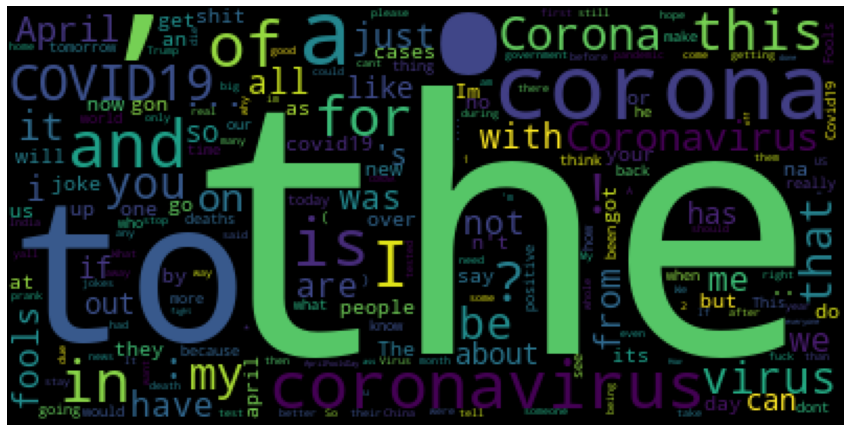

In [13]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
data.columns

Index(['ID', 'Tweet', 'Labels'], dtype='object')

In [15]:
data_list = data["Tweet"].tolist()

In [16]:
porter=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
stop = set(stopwords.words('english'))


exclude = set(string.punctuation)

#Create a single function to preprocess
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(wordnet_lemmatizer.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(line).split() for line in data_list]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sudar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
doc_clean

[['joke', 'hop', 'plane', 'rn', 'well', 'covid19', 'lol'],
 ['banmediahouse',
  'whose',
  'responsible',
  'spreading',
  'fake',
  'communal',
  'story',
  'pandemic',
  'corona',
  'situation'],
 ['im',
  'waiting',
  'someone',
  'say',
  'corona',
  'thing',
  'april',
  'fool',
  'joke'],
 ['liar',
  'proven',
  'day',
  'night',
  'time',
  'again',
  'lie',
  'truth',
  'do',
  'covid19'],
 ['new',
  'u',
  'coronavirus',
  'death',
  'toll',
  'reach',
  '4000',
  'nearly',
  '900',
  'new',
  'death',
  'reported',
  'today',
  'bno',
  'news',
  'covid19',
  'coronavirusoutbreak'],
 ['coronavirus',
  'impact',
  'govt',
  'extends',
  'it',
  'deadline',
  'related',
  'section',
  '80c',
  '80d'],
 ['42000',
  'people',
  'might',
  'died',
  'china',
  'covid19',
  'china',
  'underreporting',
  'according',
  'source'],
 ['dear',
  'chinese',
  'kindly',
  'cook',
  'bat',
  'thoroughly',
  'next',
  'time',
  'regard',
  'covid19',
  'coronavirusupdates',
  'coronavirus'

In [18]:
dictionary = corpora.Dictionary(doc_clean)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(doc_term_matrix, num_topics=20, id2word = dictionary, passes=50)


for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

example = doc_clean[100]
print(example,'\n')
example_lda = dictionary.doc2bow(example)

for index, score in sorted(ldamodel[example_lda], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel.print_topic(index, 5)))
    

lda_display = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Topic: 0 Word: 0.066*"coronavirus" + 0.024*"death" + 0.023*"u" + 0.020*"covid19" + 0.016*"last" + 0.015*"usa" + 0.015*"ever" + 0.015*"breaking" + 0.013*"thing" + 0.013*"toll"
Topic: 1 Word: 0.059*"corona" + 0.030*"virus" + 0.026*"coronavirus" + 0.025*"cant" + 0.022*"life" + 0.020*"covid19" + 0.013*"go" + 0.012*"time" + 0.011*"twitter" + 0.011*"due"
Topic: 2 Word: 0.096*"corona" + 0.033*"virus" + 0.026*"im" + 0.019*"yall" + 0.015*"get" + 0.015*"still" + 0.015*"shit" + 0.013*"coronavirus" + 0.013*"as" + 0.012*"like"
Topic: 3 Word: 0.059*"home" + 0.058*"stay" + 0.037*"covid19" + 0.031*"fight" + 0.025*"coronavirus" + 0.023*"day" + 0.023*"india" + 0.022*"safe" + 0.019*"week" + 0.018*"1"
Topic: 4 Word: 0.075*"positive" + 0.058*"test" + 0.050*"covid19" + 0.047*"tested" + 0.015*"came" + 0.014*"far" + 0.013*"hospital" + 0.013*"coronavirus" + 0.011*"doctor" + 0.011*"patient"
Topic: 5 Word: 0.078*"corona" + 0.036*"coronavirus" + 0.033*"im" + 0.030*"shit" + 0.020*"time" + 0.019*"fuck" + 0.018*"rea

In [19]:
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(2, 1),
  (9, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(0, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(36, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(0, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(0, 1),
  (31, 1),
  (36, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(0, 1),
  (51, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1)],
 [(17, 1

In [20]:
from textblob import TextBlob

In [24]:
for sentence in data["Tweet"]:
    print(sentence,'\n')
    sentiment = TextBlob(sentence)
    print(sentiment.sentiment,'\n')

NO JOKE I WILL HOP ON A PLANE RN! (Well after COVID19 lol) 

Sentiment(polarity=0.8, subjectivity=0.7) 

BanMediaHouse whose is responsible for spreading Fake and communal Stories in this pandemic Corona situation. 

Sentiment(polarity=-0.15, subjectivity=0.775) 

Im waiting for someone to say to me that all this corona thing is just an April fools joke 

Sentiment(polarity=0.0, subjectivity=0.0) 

He is a liar. Proven day night. Time again. Lies when the truth will do. COVID19 

Sentiment(polarity=0.0, subjectivity=0.0) 

NEW: U.S. CoronaVirus death toll reaches 4,000 after nearly 900 new deaths were reported today (BNO News) Covid19 CoronaVirusOutbreak 

Sentiment(polarity=0.12424242424242422, subjectivity=0.43636363636363634) 

Coronavirus impact Govt extends I-T deadlines related to Sections 80C, 80D 

Sentiment(polarity=0.0, subjectivity=0.4) 

42,000 people might have died in China from Covid19 but China was underreporting according to sources. 

Sentiment(polarity=0.0, subjectiv

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sudar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for sentence in data["Tweet"]: 
    print(sentence,'\n')
    sentiment = analyzer.polarity_scores(sentence)
    print(sentiment,'\n')
        

NO JOKE I WILL HOP ON A PLANE RN! (Well after COVID19 lol) 

{'neg': 0.197, 'neu': 0.605, 'pos': 0.197, 'compound': 0.0} 

BanMediaHouse whose is responsible for spreading Fake and communal Stories in this pandemic Corona situation. 

{'neg': 0.168, 'neu': 0.707, 'pos': 0.125, 'compound': -0.2023} 

Im waiting for someone to say to me that all this corona thing is just an April fools joke 

{'neg': 0.143, 'neu': 0.759, 'pos': 0.098, 'compound': -0.25} 

He is a liar. Proven day night. Time again. Lies when the truth will do. COVID19 

{'neg': 0.299, 'neu': 0.588, 'pos': 0.113, 'compound': -0.5859} 

NEW: U.S. CoronaVirus death toll reaches 4,000 after nearly 900 new deaths were reported today (BNO News) Covid19 CoronaVirusOutbreak 

{'neg': 0.176, 'neu': 0.769, 'pos': 0.054, 'compound': -0.5719} 

Coronavirus impact Govt extends I-T deadlines related to Sections 80C, 80D 

{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.128} 

42,000 people might have died in China from Covid19 bu